### Student Information
Name: 劉冠銘

Student ID: 112352014 (NCCU)

GitHub ID: 6mingg

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [87]:
### Begin Assignment Here

In [88]:
# Packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PAMI.extras.convert.DF2DB import DF2DB
import os
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import umap
from wordcloud import WordCloud
from PAMI.frequentPattern.basic import FPGrowth as alg
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# II. Follow the same process from the DM2024-Lab1-Master

## 1. Data

In [89]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [90]:
# change sentiment to numeric
df['cat'] = df['sentiment'].map({'not nostalgia': -1, 'nostalgia': 1})
df

,sentiment,comment,cat
0,not nostalgia,He was a singer with a golden voice that I lov...,-1
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,-1
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",-1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,-1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",-1
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


In [91]:
# check if there is any null or nan in the data
df.isnull().sum()

sentiment    0
comment      0
cat          0
dtype: int64

In [92]:
# check if there is any duplicated in the data
df.duplicated().sum()

1

In [93]:
# drop duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [94]:
# count the number of each sentiment
df['sentiment'].value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

## 2. Feature Creation

In [95]:
# Change text to token and remove stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['unigrams'] = df['comment'].apply(lambda x: word_tokenize(x))
# df['unigrams'] = df['unigrams'].apply(lambda x: [word for word in x if word.isalpha()])
df['unigrams'] = df['unigrams'].apply(lambda x: [word for word in x if word not in stop_words])
df['unigrams'] = df['unigrams'].apply(lambda x: [word.lower() for word in x])
# 連接list裡面的詞 by space
df['unigrams'] = df['unigrams'].apply(lambda x: ' '.join(x))

df['unigrams list'] = df['unigrams'].apply(lambda x: [i for i in x.split(' ')])
X = df
X

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,comment,cat,unigrams,unigrams list
0,not nostalgia,He was a singer with a golden voice that I lov...,-1,he singer golden voice i love hear time . i gr...,"[he, singer, golden, voice, i, love, hear, tim..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,the mist beautiful voice ever i listened i kid...,"[the, mist, beautiful, voice, ever, i, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,i mr. reeves songs . always love smooth voice ...,"[i, mr., reeves, songs, ., always, love, smoot..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,-1,30 day leave 1st tour viet nam convince mary l...,"[30, day, leave, 1st, tour, viet, nam, convinc..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,listening songs reminds mum played everyday,"[listening, songs, reminds, mum, played, every..."
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",-1,"n't know ! .. opening video , .. seeing , .. w...","[n't, know, !, .., opening, video, ,, .., seei..."
1496,not nostalgia,it's sad this is such a beautiful song when yo...,-1,'s sad beautiful song love someone afraid tell...,"['s, sad, beautiful, song, love, someone, afra..."
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",-1,"dear friend , i think age time important comes...","[dear, friend, ,, i, think, age, time, importa..."
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,i born 1954 started aware popular music grandm...,"[i, born, 1954, started, aware, popular, music..."


This block is used to convert the text data into a matrix of token counts using CountVectorizer and show the top 100 most frequent terms in the data - with stop words (ex : this, is ,was...... )

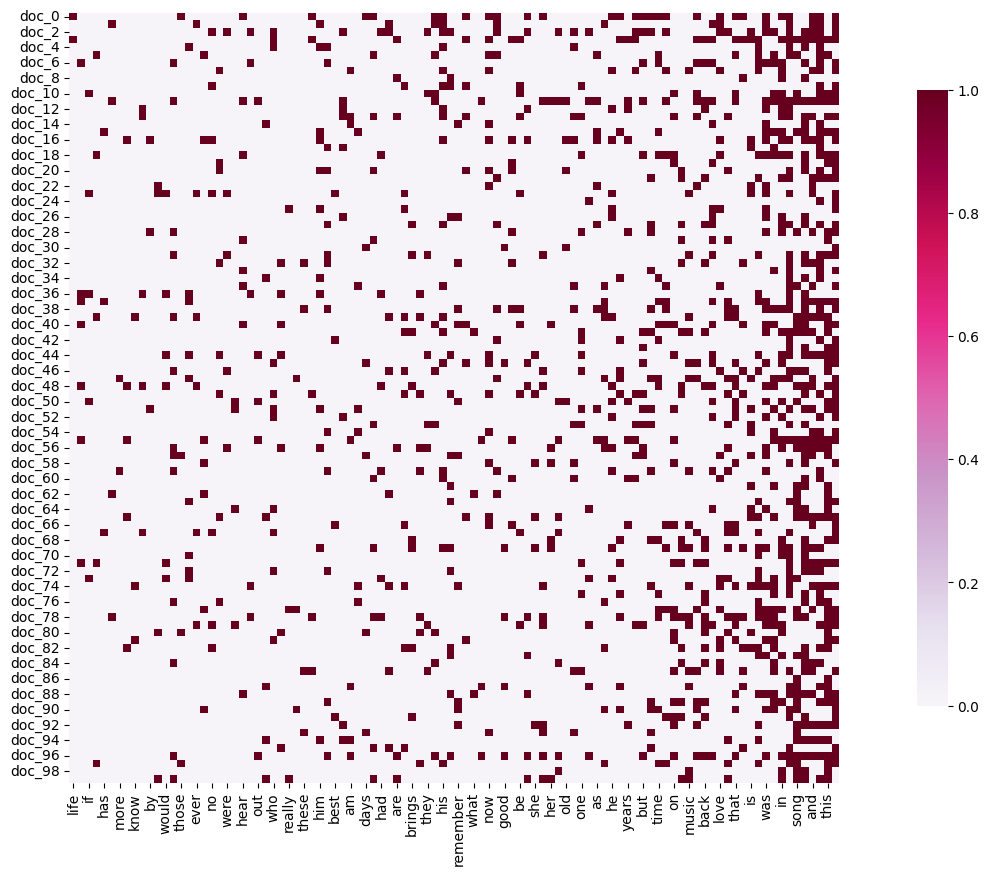

In [96]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix


# This block is used to show the top 100 most frequent terms in the data

freq_term = X_counts.sum(axis=0).A1  # .A1 將結果轉換為一維數組

freq_term_idx = np.argsort(freq_term)[-100:]
plot_x = [count_vect.get_feature_names_out()[i] for i in freq_term_idx]

num = 100
plot_y = [f"doc_{i}" for i in range(num)]

plot_z = X_counts[:num, freq_term_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(df_todraw, 
                 cmap="PuRd", 
                 vmin=0, 
                 vmax=np.percentile(plot_z, 95),  
                 square=True,
                 cbar_kws={"shrink": .8})

This block is used to convert the text data into a matrix of token counts using CountVectorizer and show the top 100 most frequent terms in the data - without stop words 

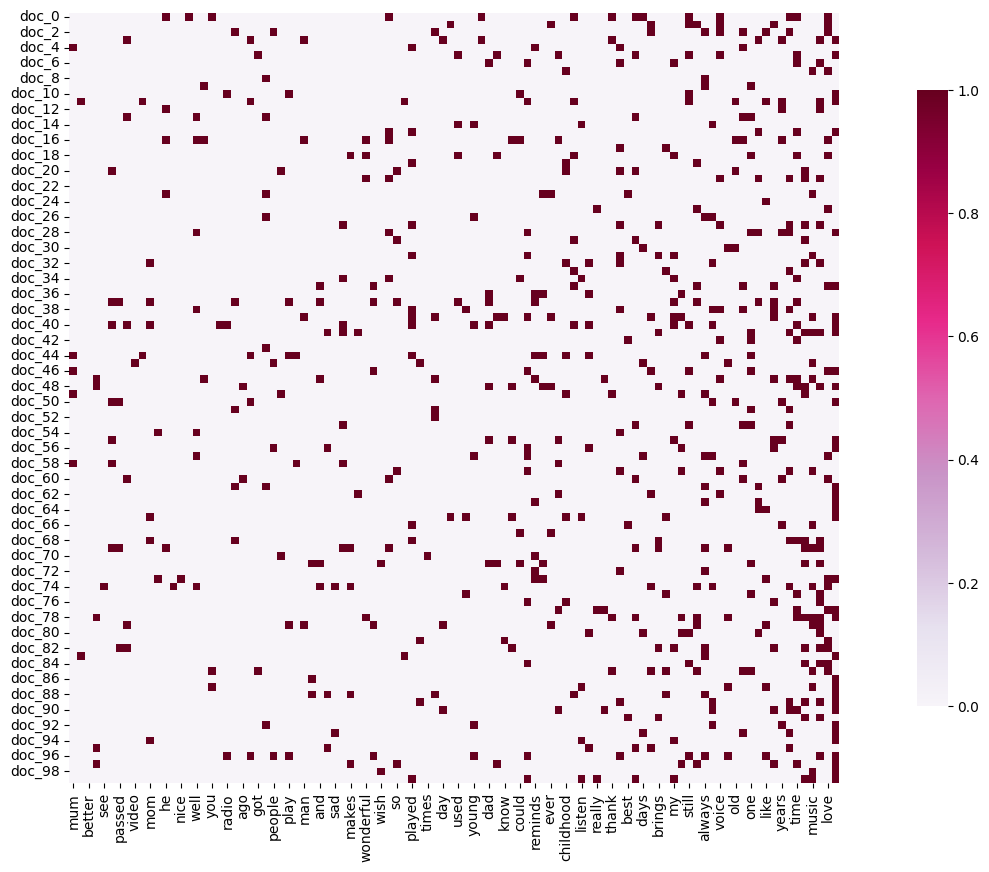

In [97]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.unigrams) #learn the vocabulary and return document-term matrix


# This block is used to show the top 100 most frequent terms in the data

freq_term = X_counts.sum(axis=0).A1  # .A1 將結果轉換為一維數組

freq_term_idx = np.argsort(freq_term)[-100:]
plot_x = [count_vect.get_feature_names_out()[i] for i in freq_term_idx]

num = 100
plot_y = [f"doc_{i}" for i in range(num)]

plot_z = X_counts[:num, freq_term_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(20, 10))

ax = sns.heatmap(df_todraw, 
                 cmap="PuRd", 
                 vmin=0, 
                 vmax=np.percentile(plot_z, 95),  
                 square=True,
                 cbar_kws={"shrink": .8})

And we will use this version(without stop words) of X_counts to do the rest of work.

In [98]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

feature_names = count_vect.get_feature_names_out()
term_frequencies_dict = dict(zip(feature_names, term_frequencies))
sorted_term_frequencies = sorted(term_frequencies_dict.items(), key=lambda x: x[1], reverse=True)[:300]

sorted_feature_names, sorted_frequencies = zip(*sorted_term_frequencies) # 這句話的意思是將sorted_term_frequencies裡面的key和value分別存到sorted_feature_names和sorted_frequencies裡面，那個*是用來解包的

fig = go.Figure(data=[
    go.Bar(x=sorted_feature_names, y=sorted_frequencies)
])

fig.update_layout(
    title='Top 300 Most Frequent Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=270,
    width=1000,  # 調整寬度
    height=500   # 調整高度
)

fig.show()

## 3. Finding Patterns

In [99]:
#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['unigrams'])  # ****I used the virsion of unigrams without stopwords****
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [100]:
for k in category_dfs.keys():
    print(f'keys : {k}, length : {len(category_dfs[k])}')

keys : not nostalgia, length : 749
keys : nostalgia, length : 750


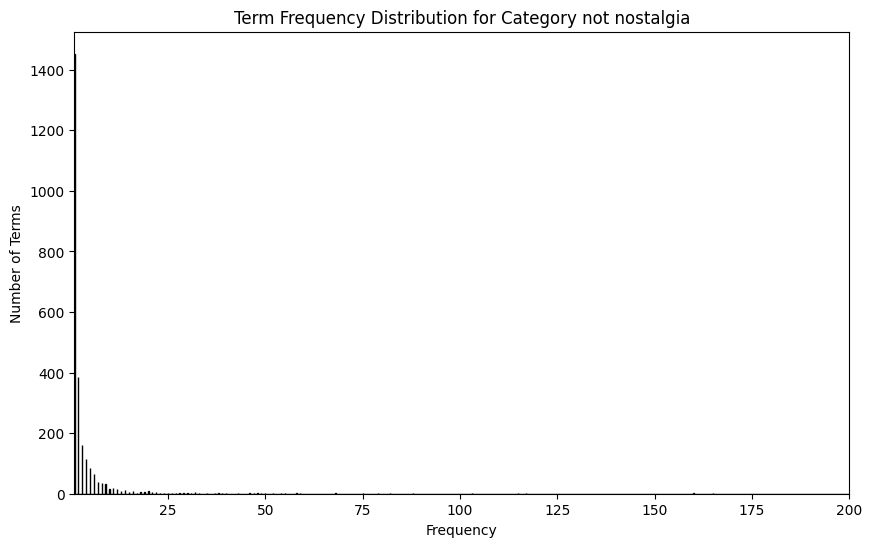

In [101]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3, 0 menas 'idx = 0' in categories
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

可以從上圖看出，在 "not nostalgia"這個分類中 ，大部分的詞其實都只出現了不到10次，相當平均，只有少數的詞不斷重複。

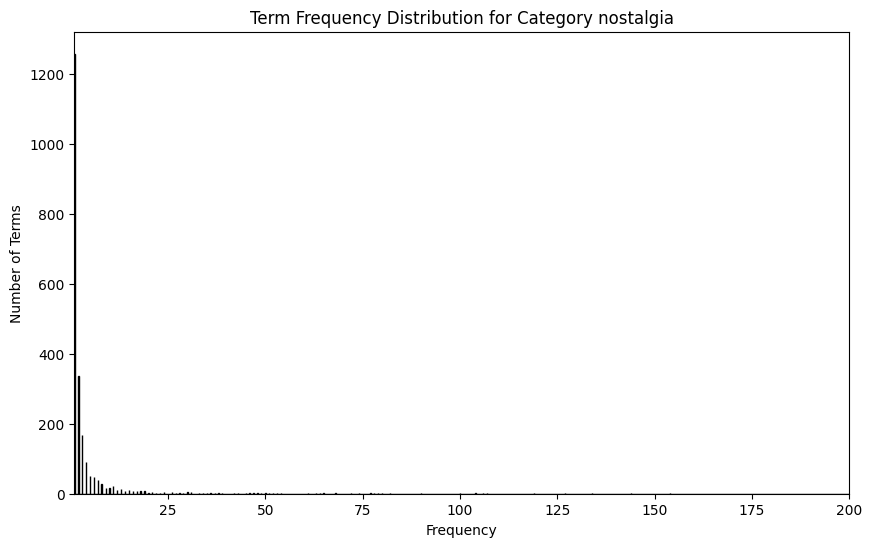

In [102]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 3, 0 menas 'idx = 0' in categories
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

可以從上圖看出，在 "nostalgia"這個分類中 ，大部分的詞跟nostalgia一樣，其實都只出現了不到10次，相當平均，只有少數的詞不斷重複。

另外由於在這裡已經把stopwords全部移除了，所以這裡不進行將頭跟尾去除的動作，因為每篇文章出現最多次的幾乎都是那些stopwords。

### PAMI

In [103]:
abs_path = r'C:\Users\USER\Desktop\NCCU\二上\資料探勘\lab1\DMLab1\DM2024-Lab1-Homework'

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])
    try : # using relative path
        obj.convert2TransactionalDatabase(os.path.join(f'td_freq_db_{category}.csv'), '>=', 1)
    except: # using absolute path
        obj.convert2TransactionalDatabase(os.path.join(abs_path, f'td_freq_db_{category}.csv'), '>=', 1)


#### FPGrowth

In [104]:
ca = 0
minSup=9
obj1 = alg.FPGrowth(iFile=f'td_freq_db_{categories[ca]}.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not))) # print the total number of patterns ，這裡「模式」代表一群詞彙經常一起出現的組合。
print('Runtime: ' + str(obj1.getRuntime())) # measure the runtime
obj1.save(f'freq_patterns_{categories[ca]}_minSup9.txt') # save the patterns to a file

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 354
Runtime: 0.06349611282348633


In [105]:
ca = 1
minSup=9
obj2 = alg.FPGrowth(iFile=f'td_freq_db_{categories[ca]}.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) # print the total number of patterns ，這裡「模式」代表一群詞彙經常一起出現的組合。
print('Runtime: ' + str(obj2.getRuntime())) # measure the runtime
obj2.save(f'freq_patterns_{categories[ca]}_minSup9.txt') # save the patterns to a file

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 950
Runtime: 0.08947277069091797


In [106]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF, frequentPatternsDF_not]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1} # 只有出現過一次的模式
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs) # 總共有多少模式
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns) # 有多少模式被丟棄

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df) # 把只有出現過一次的模式的dataframe存起來

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True) # 把所有的dataframe合併成一個

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False) # 依照support排序

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

            Patterns  Support
748         memories      227
721         remember      121
751    memories back      117
752        back song      113
749    memories song      108
..               ...      ...
290        heard old        9
284   young memories        9
283  every time song        9
274       listen old        9
0               just        9

[910 rows x 2 columns]
Number of patterns discarded: 394


In [107]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['unigrams'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['unigrams'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns']) # 初始化一個dataframe，裡面都是0

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0) # 如果pattern_words是x的子集合，就把1放進去，否則放0

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index) # 把tdm轉換成dataframe

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,used time,used years,never years song,never memories,heard my,heard old,young memories,every time song,listen old,just
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction  
在這邊不用pca，改用t-SNE&UMAP，試試看效果，因為PCA要求特徵間有線性關係。

In [108]:
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [109]:
# Answer here

num = 3
X_pca_aug = PCA(n_components=num).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=num).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=num).fit_transform(augmented_df.values)

col = [ 'blue',  'orange']
categories = X['sentiment'].unique()

def create_3d_scatter(X_reduced, name, colors, categories):
    data = []
    for c, category in zip(colors, categories):
        indices = X['sentiment'] == category
        trace = go.Scatter3d(
            x=X_reduced[indices, 0],
            y=X_reduced[indices, 1],
            z=X_reduced[indices, 2],
            mode='markers',
            marker=dict(size=5, color=c),
            name=category
        )
        data.append(trace)
    return data

tsne_data = create_3d_scatter(X_tsne_aug, 't-SNE', col, categories)
umap_data = create_3d_scatter(X_umap_aug, 'UMAP', col, categories)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('t-SNE', 'UMAP')
)

for trace in tsne_data:
    fig.add_trace(trace, row=1, col=1)
for trace in umap_data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    height=800, width=1800,
    title_text='t-SNE, and UMAP Comparison in 3D',
    template='plotly_dark'
)

fig.show()


看起來當特徵數目減少到三個之後，效果看起來還過得去，尤其是UMAP。

## 4.Data Exploration  
相似度比較

In [110]:
pos = X[X['cat'] == 1]
neg = X[X['cat'] == -1]

vectorizer = CountVectorizer()

vectors_pos= vectorizer.fit_transform(pos['comment'])
cosine_pos = cosine_similarity(vectors_pos)
avg_sim_pos = np.mean([cosine_pos[i, j] for i, j in itertools.combinations(range(cosine_pos.shape[0]), 2)])

vectors_neg = vectorizer.fit_transform(neg['comment'])
cosine_neg = cosine_similarity(vectors_neg)
avg_sim_neg = np.mean([cosine_neg[i, j] for i, j in itertools.combinations(range(cosine_neg.shape[0]), 2)])

vectors_all = vectorizer.fit_transform(X['comment'])
cosine_sim_all = cosine_similarity(vectors_all)
avg_sim_all = np.mean([cosine_sim_all[i, j] for i, j in itertools.combinations(range(cosine_sim_all.shape[0]), 2)])

print('Cosine Similarity Results of using "comment":')
print("nostalgia 內部的平均相似度 : ", avg_sim_pos)
print("not nostalgia 內部的平均相似度：", avg_sim_neg)
print("所有數據的平均相似度：", avg_sim_all)

vectorizer = CountVectorizer()

vectors_pos= vectorizer.fit_transform(pos['unigrams'])
cosine_pos = cosine_similarity(vectors_pos)
avg_sim_pos = np.mean([cosine_pos[i, j] for i, j in itertools.combinations(range(cosine_pos.shape[0]), 2)])

vectors_neg = vectorizer.fit_transform(neg['unigrams'])
cosine_neg = cosine_similarity(vectors_neg)
avg_sim_neg = np.mean([cosine_neg[i, j] for i, j in itertools.combinations(range(cosine_neg.shape[0]), 2)])

vectors_all = vectorizer.fit_transform(X['unigrams'])
cosine_sim_all = cosine_similarity(vectors_all)
avg_sim_all = np.mean([cosine_sim_all[i, j] for i, j in itertools.combinations(range(cosine_sim_all.shape[0]), 2)])
print('\n')
print('Cosine Similarity Results of using "unigrams":')
print("nostalgia 內部的平均相似度 : ", avg_sim_pos)
print("not nostalgia 內部的平均相似度：", avg_sim_neg)
print("所有數據的平均相似度：", avg_sim_all)

Cosine Similarity Results of using "comment":
nostalgia 內部的平均相似度 :  0.16623011190741213
not nostalgia 內部的平均相似度： 0.12399828984606216
所有數據的平均相似度： 0.13504103816130913


Cosine Similarity Results of using "unigrams":
nostalgia 內部的平均相似度 :  0.07641707014648458
not nostalgia 內部的平均相似度： 0.040625207347446686
所有數據的平均相似度： 0.049896350644961285


從上面結果可以看出，nostalgia內部的相似度比較大，而not nostalgia內部的相似度反而比整體相似度還要低，說明分類屬於not nostalgia的文章，從cosine similarity的角度來看沒那麼像，也分別從已經排除stopwords的unigram以及最一開始的comment進行確認與比較了。

# III. Please attempt the following tasks on the new dataset
1. Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.   
2. Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency)  
3. Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  

## 1. Data Visualization  
在上面我已經做出了高頻率詞彙出現次數比較圖、可視化降維圖(t-SNE&UMAP)，在這邊則會進行其他嘗試。

In [111]:
print('在這邊我們會使用此 dataframe 來進行 Data Visualization。')
X

在這邊我們會使用此 dataframe 來進行 Data Visualization。


,sentiment,comment,cat,unigrams,unigrams list,tokenized_text
0,not nostalgia,He was a singer with a golden voice that I lov...,-1,he singer golden voice i love hear time . i gr...,"[he, singer, golden, voice, i, love, hear, tim...","{emotional, ,, many, 16years, he, loving, fan,..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,the mist beautiful voice ever i listened i kid...,"[the, mist, beautiful, voice, ever, i, listene...","{forgotten, mist, i, ever, listened, singing, ..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,i mr. reeves songs . always love smooth voice ...,"[i, mr., reeves, songs, ., always, love, smoot...","{,, loving, comforting, never, sounds, simple,..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,-1,30 day leave 1st tour viet nam convince mary l...,"[30, day, leave, 1st, tour, viet, nam, convinc...","{,, back, man, tour, came, now, served, ., thi..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,listening songs reminds mum played everyday,"[listening, songs, reminds, mum, played, every...","{mum, listening, reminds, songs, played, every..."
...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",-1,"n't know ! .. opening video , .. seeing , .. w...","[n't, know, !, .., opening, video, ,, .., seei...","{know, ,, richard, !, well, ..., video, got, ...."
1496,not nostalgia,it's sad this is such a beautiful song when yo...,-1,'s sad beautiful song love someone afraid tell...,"['s, sad, beautiful, song, love, someone, afra...","{someone, feel, .., sad, love, tell, afraid, b..."
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",-1,"dear friend , i think age time important comes...","[dear, friend, ,, i, think, age, time, importa...","{,, dear, i, age, music, time, glad, think, fr..."
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,i born 1954 started aware popular music grandm...,"[i, born, 1954, started, aware, popular, music...","{,, many, he, even, born, started, never, 5, c..."


### 分類分布

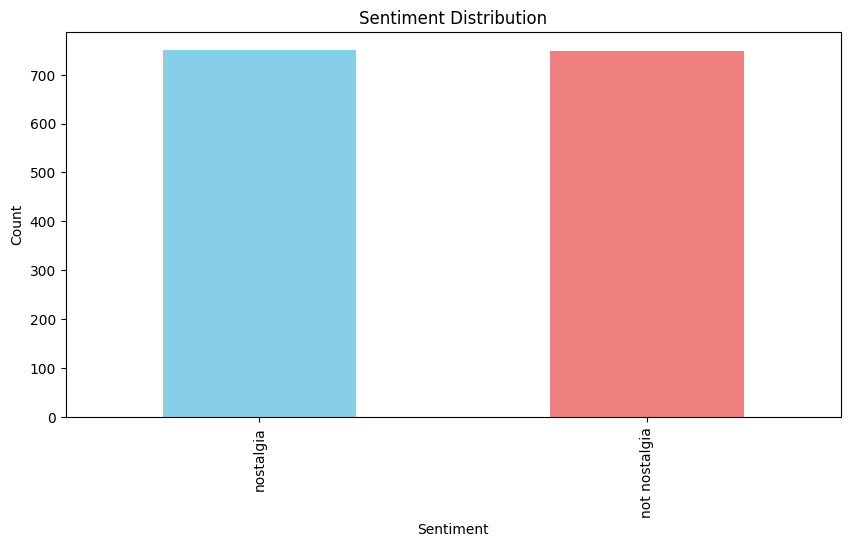

In [112]:
plt.figure(figsize=(10, 5))
X['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 詞雲

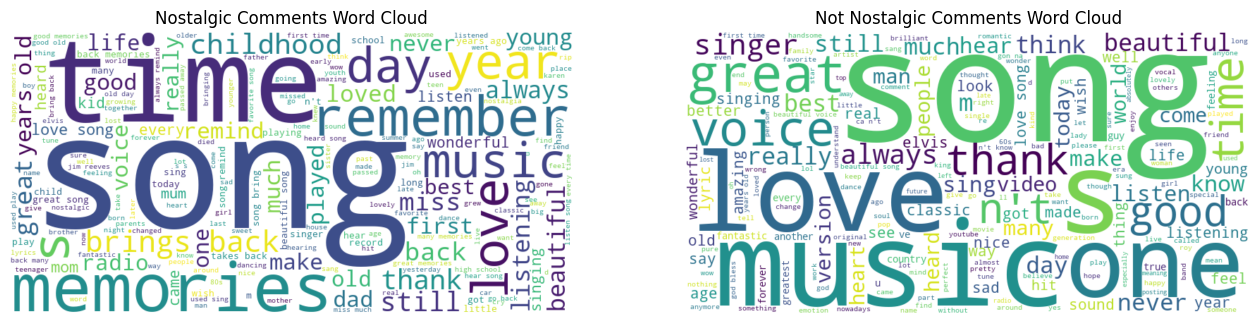

In [113]:
nostalgic_text = ' '.join(X[X['sentiment'] == 'nostalgia']['unigrams'])
not_nostalgic_text = ' '.join(X[X['sentiment'] == 'not nostalgia']['unigrams'])

nostalgic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgic_text)
not_nostalgic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_nostalgic_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(nostalgic_wordcloud, interpolation='bilinear')
plt.title('Nostalgic Comments Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(not_nostalgic_wordcloud, interpolation='bilinear')
plt.title('Not Nostalgic Comments Word Cloud')
plt.axis('off')
plt.show()


可以從上圖中看出，nostalgic裡面，一些關於懷舊的詞會比較多，像是memories, time, remember等等，而not nostalgic中，則都是以讚美相關的詞會比較多，像是love, great等等。

### 長度分布

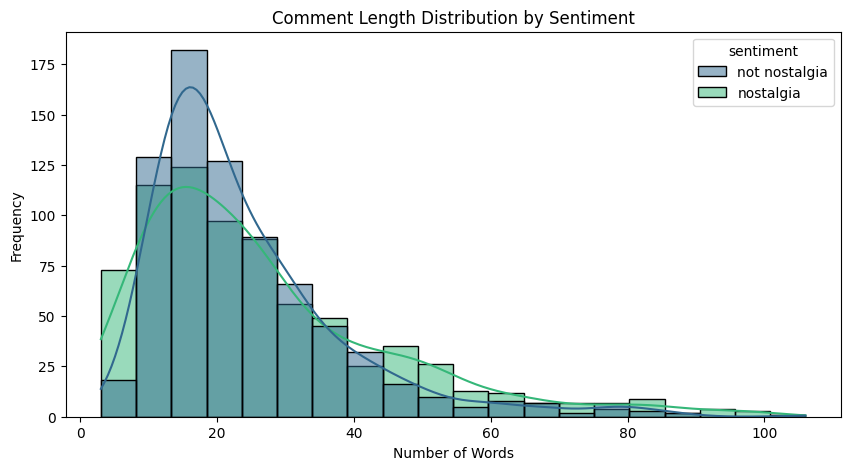

In [114]:
pd.options.mode.chained_assignment = None # ignore SettingWithCopyWarning


X['comment_length'] = X['comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=X, x='comment_length', hue='sentiment', kde=True, palette='viridis', bins=20)
plt.title('Comment Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

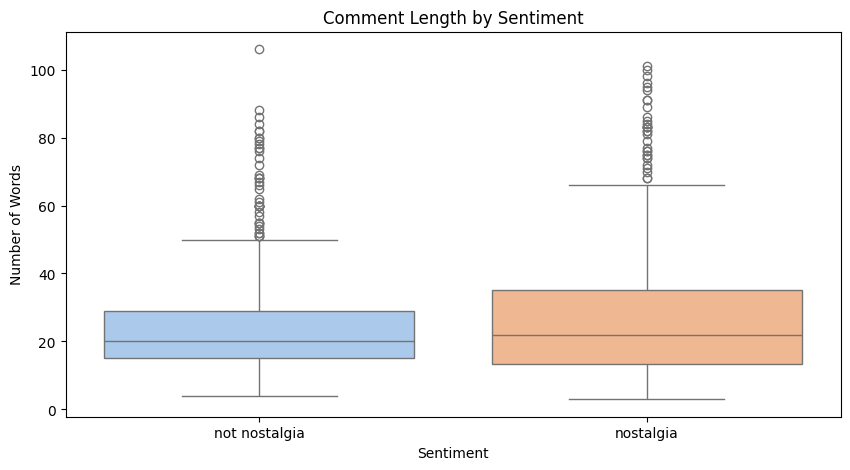

In [115]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X, x='sentiment', y='comment_length', palette='pastel')
plt.title('Comment Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

### LDA  


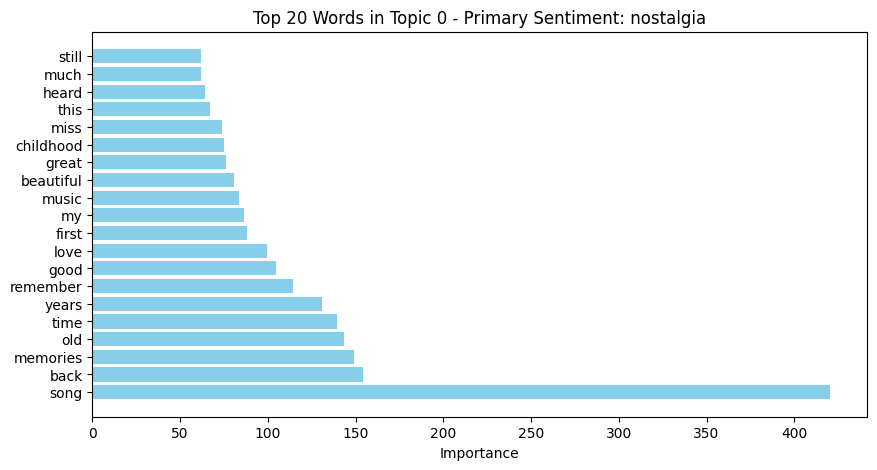

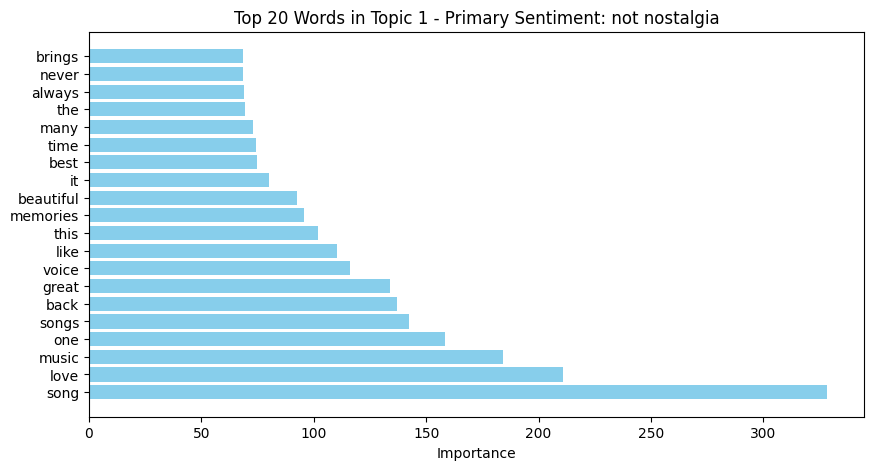

In [116]:
vectorizer = CountVectorizer()
lda_vectors = vectorizer.fit_transform(X['unigrams'])

lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
lda_model.fit(lda_vectors)
terms = vectorizer.get_feature_names_out()

document_topic_distributions = lda_model.transform(lda_vectors)
document_topic_df = pd.DataFrame(document_topic_distributions, columns=['Topic 0', 'Topic 1'])
document_topic_df['sentiment'] = X['sentiment'].values

topic_sentiment_summary = document_topic_df.groupby('sentiment').mean()

topic_sentiments = topic_sentiment_summary.idxmax()

num = 20

for idx, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[-num:]
    top_words = [terms[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]
    primary_sentiment = topic_sentiments[f'Topic {idx}']

    plt.figure(figsize=(10, 5))
    plt.barh(top_words, top_weights, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Top {num} Words in Topic {idx} - Primary Sentiment: {primary_sentiment}')
    plt.gca().invert_yaxis() 
    plt.show()

從上面兩張圖可以看出，兩個分類中，"song"佔的數量都是最多的，而且song對於這個分類來說，似乎影響不大，因為兩者的文本中，都是在討論song這件事情，所以我們可以考慮進行分類的時候，把song這個詞拿掉。

### 關聯詞分析

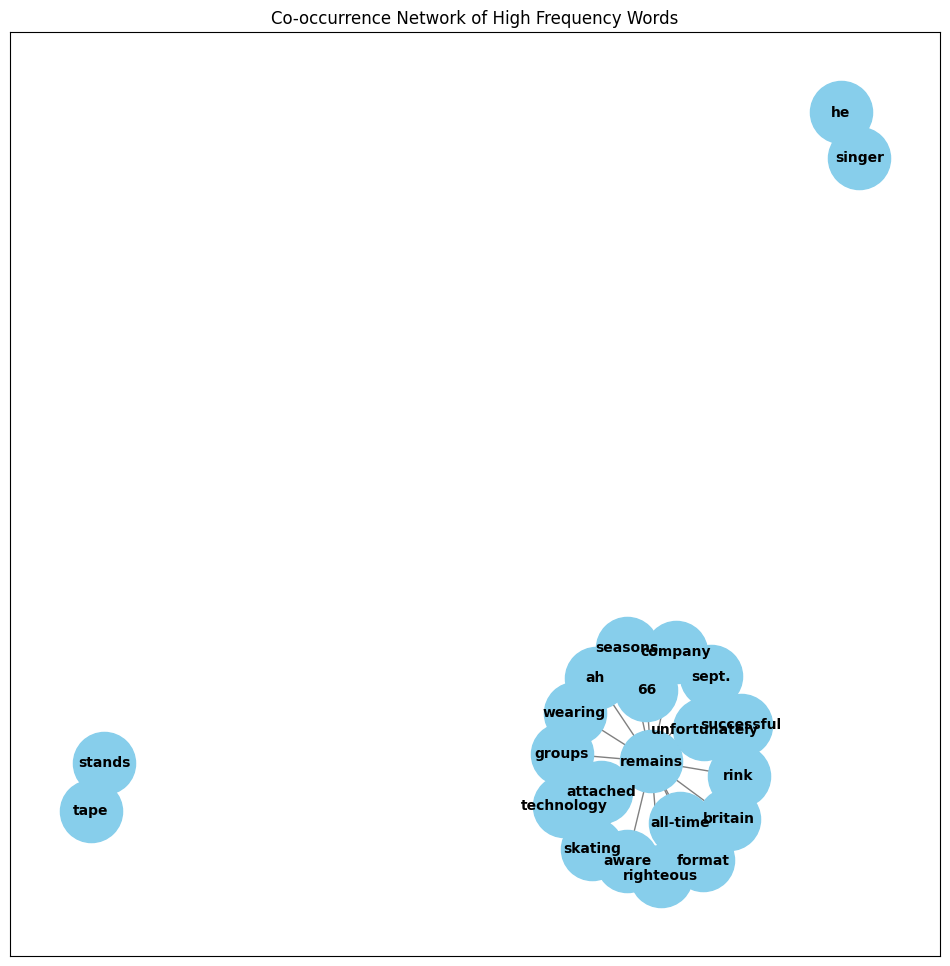

In [117]:
all_unigrams = X['unigrams list'].sum()
word_counter = Counter(all_unigrams)

filtered_unigrams = [word for word, count in word_counter.items() if count >= 2]

word_pairs = list(itertools.combinations(filtered_unigrams, 2))
word_freq = pd.Series(word_pairs).value_counts().nlargest(20)


# Create a graph
G = nx.Graph()
for (word1, word2), freq in word_freq.items():
    G.add_edge(word1, word2, weight=freq)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')
plt.title('Co-occurrence Network of High Frequency Words')
plt.show()


這張圖展示了不同詞在文本中一起出現的情況，下面孤立的點表示這些詞都是單獨出現，或是與其他單詞的關係不明顯。右下方表示這些詞比起其他詞有更高的關聯性，但如果仔細觀察這些詞，會發現串再一起似乎沒什麼意義。

## 2. TF-IDF features

In [118]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(X['unigrams'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df

,00,000,045,07,10,100,10m,11,11th,12,...,youngsters,your,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Naive Bayes classifier

In [119]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(X['comment'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head(10)

,10,100,11,12,13,14,15,16,17,18,...,yeah,year,years,yes,yesterday,young,younger,youth,youtube,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183995,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.092273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
X

,sentiment,comment,cat,unigrams,unigrams list,tokenized_text,comment_length
0,not nostalgia,He was a singer with a golden voice that I lov...,-1,he singer golden voice i love hear time . i gr...,"[he, singer, golden, voice, i, love, hear, tim...","{emotional, ,, many, 16years, he, loving, fan,...",60
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,the mist beautiful voice ever i listened i kid...,"[the, mist, beautiful, voice, ever, i, listene...","{forgotten, mist, i, ever, listened, singing, ...",26
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,i mr. reeves songs . always love smooth voice ...,"[i, mr., reeves, songs, ., always, love, smoot...","{,, loving, comforting, never, sounds, simple,...",74
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,-1,30 day leave 1st tour viet nam convince mary l...,"[30, day, leave, 1st, tour, viet, nam, convinc...","{,, back, man, tour, came, now, served, ., thi...",68
4,nostalgia,listening to his songs reminds me of my mum wh...,1,listening songs reminds mum played everyday,"[listening, songs, reminds, mum, played, every...","{mum, listening, reminds, songs, played, every...",13
...,...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",-1,"n't know ! .. opening video , .. seeing , .. w...","[n't, know, !, .., opening, video, ,, .., seei...","{know, ,, richard, !, well, ..., video, got, ....",25
1496,not nostalgia,it's sad this is such a beautiful song when yo...,-1,'s sad beautiful song love someone afraid tell...,"['s, sad, beautiful, song, love, someone, afra...","{someone, feel, .., sad, love, tell, afraid, b...",22
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",-1,"dear friend , i think age time important comes...","[dear, friend, ,, i, think, age, time, importa...","{,, dear, i, age, music, time, glad, think, fr...",23
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,i born 1954 started aware popular music grandm...,"[i, born, 1954, started, aware, popular, music...","{,, many, he, even, born, started, never, 5, c...",62


In [121]:
count_vect = CountVectorizer(max_features=100, stop_words='english')
X_tdm = count_vect.fit_transform(X['comment']) 
terms = count_vect.get_feature_names_out()  
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index) # 把tdm轉換成dataframe

In [122]:
X

,sentiment,comment,cat,unigrams,unigrams list,tokenized_text,comment_length
0,not nostalgia,He was a singer with a golden voice that I lov...,-1,he singer golden voice i love hear time . i gr...,"[he, singer, golden, voice, i, love, hear, tim...","{emotional, ,, many, 16years, he, loving, fan,...",60
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,the mist beautiful voice ever i listened i kid...,"[the, mist, beautiful, voice, ever, i, listene...","{forgotten, mist, i, ever, listened, singing, ...",26
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,i mr. reeves songs . always love smooth voice ...,"[i, mr., reeves, songs, ., always, love, smoot...","{,, loving, comforting, never, sounds, simple,...",74
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,-1,30 day leave 1st tour viet nam convince mary l...,"[30, day, leave, 1st, tour, viet, nam, convinc...","{,, back, man, tour, came, now, served, ., thi...",68
4,nostalgia,listening to his songs reminds me of my mum wh...,1,listening songs reminds mum played everyday,"[listening, songs, reminds, mum, played, every...","{mum, listening, reminds, songs, played, every...",13
...,...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",-1,"n't know ! .. opening video , .. seeing , .. w...","[n't, know, !, .., opening, video, ,, .., seei...","{know, ,, richard, !, well, ..., video, got, ....",25
1496,not nostalgia,it's sad this is such a beautiful song when yo...,-1,'s sad beautiful song love someone afraid tell...,"['s, sad, beautiful, song, love, someone, afra...","{someone, feel, .., sad, love, tell, afraid, b...",22
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",-1,"dear friend , i think age time important comes...","[dear, friend, ,, i, think, age, time, importa...","{,, dear, i, age, music, time, glad, think, fr...",23
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,i born 1954 started aware popular music grandm...,"[i, born, 1954, started, aware, popular, music...","{,, many, he, even, born, started, never, 5, c...",62


In [123]:
category_label_mapping = X[['cat', 'sentiment']].drop_duplicates().set_index('cat')['sentiment'].to_dict() # 這邊是把cat和sentiment的對應關係存到字典裡面
category_labels = [category_label_mapping[label] for label in sorted(category_label_mapping.keys())] # 這邊是把cat的label存到list裡面

X_train_tdm, X_test_tdm, y_train_tdm, y_test_tdm = train_test_split(tdm_df, X['cat'], test_size=0.3, random_state=42) # 這邊是把tdm_df和cat分成train和test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, X['cat'], test_size=0.3, random_state=42) # 這邊是把tfidf_df和cat分成train和test


#### TF-IDF

In [124]:
# MultinomialNB for Term Frequency data
print("Training and evaluating model using Term Frequency data...")
tf_model = MultinomialNB()
tf_model.fit(X_train_tdm, y_train_tdm)
tf_predictions = tf_model.predict(X_test_tdm)
tf_accuracy = accuracy_score(y_test_tdm, tf_predictions)
print(f"Model Accuracy: {tf_accuracy:.2f}")
print("\nClassification Metrics:\n", classification_report(y_test_tdm, tf_predictions, target_names=category_labels, digits=4))

# BernoulliNB for TF-IDF features
tfidf_model = BernoulliNB()
tfidf_model.fit(X_train_tfidf, y_train_tfidf)
# Generate predictions and evaluate performance
tfidf_predictions = tfidf_model.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test_tfidf, tfidf_predictions)
print(f"Model Accuracy: {tfidf_accuracy:.2f}")
print("\nClassification Metrics:\n", classification_report(y_test_tfidf, tfidf_predictions, target_names=category_labels, digits=4))

Training and evaluating model using Term Frequency data...
Model Accuracy: 0.85

Classification Metrics:
                precision    recall  f1-score   support

not nostalgia     0.8440    0.8479    0.8460       217
    nostalgia     0.8578    0.8541    0.8559       233

     accuracy                         0.8511       450
    macro avg     0.8509    0.8510    0.8509       450
 weighted avg     0.8511    0.8511    0.8511       450

Model Accuracy: 0.88

Classification Metrics:
                precision    recall  f1-score   support

not nostalgia     0.8976    0.8479    0.8720       217
    nostalgia     0.8653    0.9099    0.8870       233

     accuracy                         0.8800       450
    macro avg     0.8814    0.8789    0.8795       450
 weighted avg     0.8809    0.8800    0.8798       450



根據以上產出的數據，可以看出以下幾點:
1. TF-IDF 模型的分類性能優於詞頻模型：使用 TF-IDF 特徵的模型的準確率為 0.88，而詞頻模型的準確率為 0.85。這可看出 TF-IDF 特徵提取方法能夠更有效地捕捉文本的特徵，使模型具備更好的分類能力。  
2. TF-IDF 模型在召回率和 F1-score 方面表現更好：在 "nostalgia" 類別的識別上，TF-IDF 模型的召回率為 0.9099，顯著高於詞頻模型的 0.8541。同時，F1-score 也更高，可看出該模型在平衡精確度與召回率時具備更佳的整體性能，特別是在避免漏判 "nostalgia" 的樣本上表現突出。  
3. 總體分類性能的平衡：TF-IDF 模型在平均和加權平均的精確度、召回率、F1-score 指標上都優於詞頻模型，顯示出其在不同類別之間的分類性能更加均衡。

# IV. Obersavation

1. 數據加載與準備  
目前的數據加載過程中，缺乏對內存限制的考量，特別是面對大型數據集時，這會導致效率低下。可以採用分批加載數據的方式（例如在使用 pandas 讀取 csv 檔時設置 chunksize 參數），以降低內存佔用，提升處理效率。
  
2. 處理遺漏值  
常見的做法是使用簡單的填補方法（如填充均值或中位數），但這可能無法反映數據的真實情況。可以考慮使用更先進的填補技術，如KNN 或迭代填補，以更準確地處理數值型與類別型變量的遺漏值。
  
3. 重複數據處理  
在移除重複數據時，往往缺乏對其對數據集影響的深入分析。應先進行探索性數據分析（EDA），理解重複數據的分布特徵，再決定是否需要刪除，或保留重複數據中有價值的模式。
    
4. 樣本平衡處理  
隨機抽樣可能導致目標類別的不平衡，從而影響模型的訓練效果。建議使用分層抽樣，以維持樣本中目標類別的原始比例，從而提升模型的預測準確度。
  
5. 維度縮減  
在進行主成分分析（PCA）或其他維度縮減時，未必考慮了特徵的重要性。應在縮減前進行特徵選擇，可以使用統計方法或基於模型的方法（如隨機森林或 Lasso 回歸）來篩選出最具代表性的特徵，確保計算資源的有效利用。